In [ ]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from decimal import Decimal

NTANKS = 1+6+12+18 # 1,7,19 (1+6+12+18+..)
DIST = 30. # m 

In [2]:

def hex_grid_concentric(N, R):
    """
    Generate N points on a triangular lattice expanding as concentric hexagons
    around (0,0), with nearest-neighbor distance R.
    
    Returns:
        xs (list of float): x coordinates
        ys (list of float): y coordinates
    """
    if N <= 0:
        return [], []
    
    # Hex axial directions (pointy-top order)
    directions = [
        (1, 0), (1, -1), (0, -1),
        (-1, 0), (-1, 1), (0, 1)
    ]
    
    axial = [(0, 0)]
    if N == 1:
        return [0.0], [0.0]
    
    k = 1
    while len(axial) < N:
        # start at (-k, k) corner of ring k
        q, r = -k, k
        for (dq, dr) in directions:
            for _ in range(k):
                if len(axial) >= N:
                    break
                axial.append((q, r))
                q += dq
                r += dr
            if len(axial) >= N:
                break
        k += 1
    
    # Convert axial -> Cartesian
    xs = [R * (q + r / 2.0) for q, r in axial]
    ys = [R * (math.sqrt(3) / 2.0) * r for _, r in axial]
    
    return xs, ys

In [3]:
peps_tanks_x, peps_tanks_y = hex_grid_concentric(NTANKS, DIST)


[1 2 3 4 5 6 7]


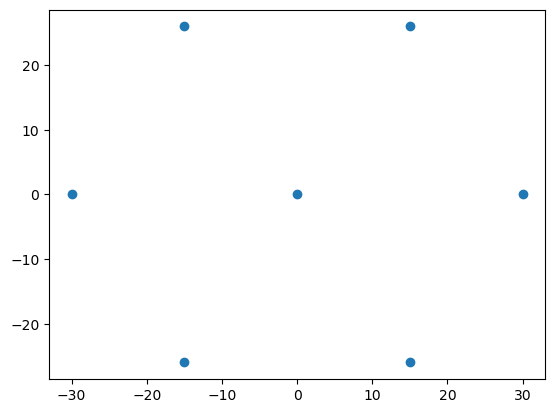

In [4]:
plt.scatter(peps_tanks_x, peps_tanks_y)

tank_id_array = np.arange(1,NTANKS+1,1)
print(tank_id_array)

In [5]:
# Write array to txt file 
stacked_array = np.column_stack((tank_id_array, peps_tanks_x, peps_tanks_y))  

n_cols = stacked_array.shape[1]
fmt_custom = ['%d'] + ['%.2f'] * (n_cols - 1)

np.savetxt('/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/PEPS_array_'+str(NTANKS)+'_tanks',stacked_array,delimiter='\t',fmt=fmt_custom)
